In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import seaborn as sns

In [3]:
df=pd.read_csv('compiled_descriptors_2.csv')

In [4]:
df=df.iloc[:,1:]

In [5]:
df['Class'].value_counts()

Class
2    284
0    189
1     96
Name: count, dtype: int64

In [6]:
x=df.drop('Class',axis=1)
y=df['Class']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(x)

In [9]:
new_df=pd.DataFrame(x_scaled,columns=x.columns)

In [10]:
new_df['Class']=y

In [11]:
new_df['Class'].value_counts()

Class
2    284
0    189
1     96
Name: count, dtype: int64

In [12]:
x_trf=new_df.drop('Class',axis=1)
y_trf=new_df['Class']

In [13]:
chi2_values, p_values=chi2(x_trf,y_trf)

In [14]:
chi2_df = pd.DataFrame({
    'Feature': x_trf.columns,
    'Chi2_Value': chi2_values,
    'P_Value': p_values
})

In [15]:
chi2_df['P_Value'].sort_values(ascending=False).tail(10)

534    0.021969
668    0.021251
662    0.014376
558    0.014351
565    0.006624
676    0.003775
515    0.001888
512    0.000317
638    0.000222
632    0.000044
Name: P_Value, dtype: float64

In [16]:
mask1=chi2_df['P_Value']<=0.05
mask2=chi2_df['Chi2_Value']>=8.00

In [17]:
train_df1=new_df[chi2_df[mask1|mask2]['Feature'].to_list()]

In [18]:
train_df1['Class']=y

C:\Users\Akshat\AppData\Local\Temp\ipykernel_15072\2222732005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1['Class']=y


In [19]:
train_df2=new_df[chi2_df[mask1&mask2]['Feature'].to_list()]

In [20]:
train_df2['Class']=y

C:\Users\Akshat\AppData\Local\Temp\ipykernel_15072\2076416898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2['Class']=y


In [21]:
train_df2

,C-005,C-016,CATS2D_04_DD,CATS2D_04_DA,T(O..F),T(F..F),F04[N-Cl],F06[C-F],Class
0,0.000000,0.333333,0.000000,0.000,0.0,0.0,0.00,0.0,0
1,0.333333,0.833333,0.000000,0.125,0.0,0.0,0.00,0.0,1
2,0.000000,0.666667,0.166667,0.375,0.0,0.0,0.00,0.0,2
3,0.000000,0.000000,0.000000,0.125,0.0,0.0,0.00,0.0,2
4,0.000000,0.000000,0.000000,0.125,0.0,0.0,0.25,0.0,2
...,...,...,...,...,...,...,...,...,...
564,0.000000,0.000000,0.166667,0.500,0.0,0.0,0.00,0.0,2
565,0.000000,0.500000,0.000000,0.000,0.0,0.0,0.00,0.0,1
566,0.666667,0.000000,0.000000,0.000,0.0,0.0,0.00,0.0,0
567,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.00,0.0,2


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf1=RandomForestClassifier()

In [24]:
x1=train_df1.drop('Class',axis=1)
y1=train_df1['Class']

In [25]:
x2=train_df2.drop('Class',axis=1)
y2=train_df2['Class']

In [26]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [27]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [28]:
clf1.fit(x_train1,y_train1)
y_pred1=clf1.predict(x_test1)

In [29]:
accuracy_score(y_pred1,y_test1)

0.6578947368421053

In [30]:
clf1.fit(x_train2,y_train2)
y_pred2=clf1.predict(x_test2)

In [31]:
accuracy_score(y_pred2,y_test2)

0.6403508771929824

In [32]:
np.mean(cross_val_score(clf1,x_train1,y_train1,scoring='accuracy',cv=10))

0.6570531400966184

In [33]:
np.mean(cross_val_score(clf1,x_train2,y_train2,scoring='accuracy',cv=10))

0.6111594202898551

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [35]:
classification_report(y_pred1,y_test1)

'              precision    recall  f1-score   support\n\n           0       0.67      0.60      0.63        43\n           1       0.15      0.33      0.21         9\n           2       0.84      0.74      0.79        62\n\n    accuracy                           0.66       114\n   macro avg       0.55      0.56      0.54       114\nweighted avg       0.72      0.66      0.68       114\n'

In [36]:
classification_report(y_pred2,y_test2)

'              precision    recall  f1-score   support\n\n           0       0.54      0.70      0.61        30\n           1       0.15      0.38      0.21         8\n           2       0.89      0.64      0.75        76\n\n    accuracy                           0.64       114\n   macro avg       0.53      0.57      0.52       114\nweighted avg       0.75      0.64      0.67       114\n'

In [37]:
confusion_matrix(y_test1,y_pred1)

array([[26,  6,  7],
       [ 8,  3,  9],
       [ 9,  0, 46]], dtype=int64)

In [38]:
confusion_matrix(y_test2,y_pred2)

array([[21,  3, 15],
       [ 5,  3, 12],
       [ 4,  2, 49]], dtype=int64)

C:\Users\Akshat\AppData\Local\Temp\ipykernel_15072\3885695879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MATS2p'], hist=False)


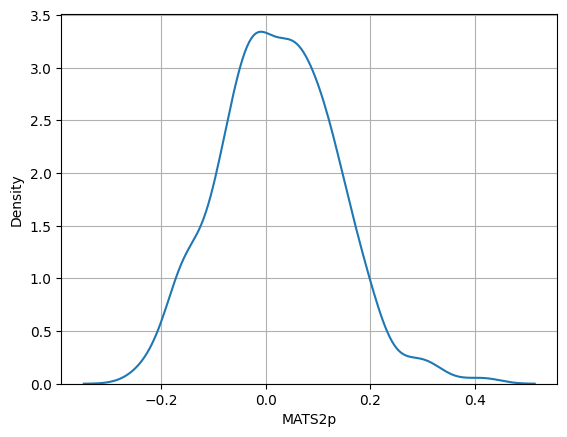

In [50]:
sns.distplot(df['MATS2p'], hist=False)
plt.grid()